In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [2]:
def convert_to_json_of_arrays(array_of_jsons):
    json_of_arrays = {}

    # Iterate through each JSON in the array
    for json_obj in array_of_jsons:
        for key, value in json_obj.items():
            # Check if the key exists in the new JSON, if not, create an array
            if key not in json_of_arrays:
                json_of_arrays[key] = []

            # Append the value to the corresponding array
            json_of_arrays[key].append(value)

    return json_of_arrays

In [3]:
compas = pd.read_csv('compas_result.csv')

In [4]:
compas.replace({'ftl_mlp_initializer': 'Fair Transition Loss', 'adversarial_debiasing_initializer': 'Adversarial Debiasing', 'gerry_fair_classifier_initializer': 'Gerry Fair Classifier', 'prejudice_remover_initializer': 'Prejudice Remover', 'simple_mlp_initializer': 'Standard MLP (baseline)'}, inplace=True)

In [5]:
cols = ['method', 'fitness_rule', 'fitness', 'ACC', 'MCC', 'f1_score', 'avg_odds_diff', 'stat_par_diff', 'eq_opp_diff']

In [6]:
compas[cols].sort_values(by=['fitness_rule','fitness'], ascending=False)

,method,fitness_rule,fitness,ACC,MCC,f1_score,avg_odds_diff,stat_par_diff,eq_opp_diff
2,Adversarial Debiasing,mcc_parity,0.322387,0.671799,0.337376,0.701107,0.029781,0.014989,0.031048
1,Fair Transition Loss,mcc_parity,0.273175,0.637763,0.284738,0.628429,0.015651,0.011562,0.023973
4,Gerry Fair Classifier,mcc_parity,0.138711,0.616694,0.240203,0.721273,0.093147,0.101493,0.064522
3,Prejudice Remover,mcc_parity,-0.397930,0.337925,-0.323429,0.255242,0.101173,0.074500,0.037162
0,Standard MLP (baseline),mcc_parity,-0.402529,0.364668,-0.255084,0.355263,0.128451,0.147445,0.074805
7,Adversarial Debiasing,mcc_opportunity,0.231140,0.664506,0.318068,0.704286,0.110528,0.124747,0.086928
9,Gerry Fair Classifier,mcc_opportunity,0.173886,0.619125,0.216441,0.728950,0.076662,0.083893,0.042556
6,Fair Transition Loss,mcc_opportunity,0.104233,0.646677,0.290247,0.669697,0.190594,0.148785,0.186014
8,Prejudice Remover,mcc_opportunity,-0.335880,0.331442,-0.320137,0.286949,0.077070,0.101491,0.015742
5,Standard MLP (baseline),mcc_opportunity,-0.466437,0.358995,-0.263183,0.325661,0.227316,0.247902,0.203254


In [7]:
fitness_rules = compas['fitness_rule'].unique().tolist()
fitness_rules

['mcc_parity',
 'mcc_opportunity',
 'acc_parity',
 'acc_opportunity',
 'mcc_odds',
 'acc_odds']

In [8]:
fitness_rules_target_metrics = {
    'mcc_parity': {'performance': 'MCC', 'fairness': 'stat_par_diff'},
    'mcc_opportunity': {'performance': 'MCC', 'fairness': 'eq_opp_diff'},
    'mcc_odds': {'performance': 'MCC', 'fairness': 'avg_odds_diff'},
    'acc_parity': {'performance': 'ACC', 'fairness': 'stat_par_diff'},
    'acc_opportunity': {'performance': 'ACC', 'fairness': 'eq_opp_diff'},
    'acc_odds': {'performance': 'ACC', 'fairness': 'avg_odds_diff'}
}

In [9]:
for fitness_rule, metrics in fitness_rules_target_metrics.items():
    compas[compas['fitness_rule'] == fitness_rule][['method', 'fitness', metrics['performance'], metrics['fairness']]].sort_values(by=['fitness'], ascending=False)

In [10]:
compas[compas['fitness_rule'] == 'mcc_parity'][['method', 'fitness', 'MCC', 'stat_par_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,MCC,stat_par_diff
2,Adversarial Debiasing,0.322387,0.337376,0.014989
1,Fair Transition Loss,0.273175,0.284738,0.011562
4,Gerry Fair Classifier,0.138711,0.240203,0.101493
3,Prejudice Remover,-0.397930,-0.323429,0.074500
0,Standard MLP (baseline),-0.402529,-0.255084,0.147445


In [11]:
compas[compas['fitness_rule'] == 'mcc_opportunity'][['method', 'fitness', 'MCC', 'eq_opp_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,MCC,eq_opp_diff
7,Adversarial Debiasing,0.231140,0.318068,0.086928
9,Gerry Fair Classifier,0.173886,0.216441,0.042556
6,Fair Transition Loss,0.104233,0.290247,0.186014
8,Prejudice Remover,-0.335880,-0.320137,0.015742
5,Standard MLP (baseline),-0.466437,-0.263183,0.203254


In [29]:
compas[compas['fitness_rule'] == 'mcc_odds'][['method', 'fitness', 'MCC', 'avg_odds_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,MCC,avg_odds_diff
22,Adversarial Debiasing,0.286168,0.351880,0.065712
24,Gerry Fair Classifier,0.255934,0.286634,0.030700
21,Fair Transition Loss,0.253381,0.317086,0.063705
23,Prejudice Remover,-0.345477,-0.215258,0.130219
20,Standard MLP (baseline),-0.579086,-0.308483,0.270602


In [13]:
compas[compas['fitness_rule'] == 'acc_parity'][['method', 'fitness', 'ACC', 'stat_par_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,ACC,stat_par_diff
11,Fair Transition Loss,0.593142,0.606969,0.013828
12,Adversarial Debiasing,0.554321,0.664506,0.110184
14,Gerry Fair Classifier,0.408634,0.417342,0.008708
13,Prejudice Remover,0.343839,0.363857,0.020019
10,Standard MLP (baseline),0.133180,0.338736,0.205556


In [30]:
compas[compas['fitness_rule'] == 'acc_odds'][['method', 'fitness', 'ACC', 'avg_odds_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,ACC,avg_odds_diff
26,Fair Transition Loss,0.630205,0.653160,0.022955
27,Adversarial Debiasing,0.550824,0.681524,0.130699
29,Gerry Fair Classifier,0.502334,0.658023,0.155689
28,Prejudice Remover,0.276268,0.367099,0.090830
25,Standard MLP (baseline),0.103883,0.356564,0.252681


In [31]:
compas[compas['fitness_rule'] == 'acc_opportunity'][['method', 'fitness', 'ACC', 'eq_opp_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,ACC,eq_opp_diff
17,Adversarial Debiasing,0.584689,0.656402,0.071713
16,Fair Transition Loss,0.578619,0.603728,0.025109
19,Gerry Fair Classifier,0.350475,0.604538,0.254063
18,Prejudice Remover,0.326839,0.354133,0.027294
15,Standard MLP (baseline),0.261604,0.366288,0.104684


In [15]:
resume = pd.pivot_table(compas, values='fitness', index='method', columns='fitness_rule')
resume

fitness_rule,acc_odds,acc_opportunity,acc_parity,mcc_odds,mcc_opportunity,mcc_parity
method,,,,,,
Adversarial Debiasing,0.550824,0.584689,0.554321,0.286168,0.231140,0.322387
Fair Transition Loss,0.630205,0.578619,0.593142,0.253381,0.104233,0.273175
Gerry Fair Classifier,0.502334,0.350475,0.408634,0.255934,0.173886,0.138711
Prejudice Remover,0.276268,0.326839,0.343839,-0.345477,-0.335880,-0.397930
Standard MLP (baseline),0.103883,0.261604,0.133180,-0.579086,-0.466437,-0.402529


/tmp/ipykernel_30571/3059069524.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tf_history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['best_solution_tf_history']
/tmp/ipykernel_30571/3059069524.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  solution = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['solution'].iloc[0]
/tmp/ipykernel_30571/3059069524.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tf_history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['best_solution_tf_history']
/tmp/ipykernel_30571/3059069524.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  solution = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['solution'].iloc[0]
/tmp/ipykernel_30571/3059069

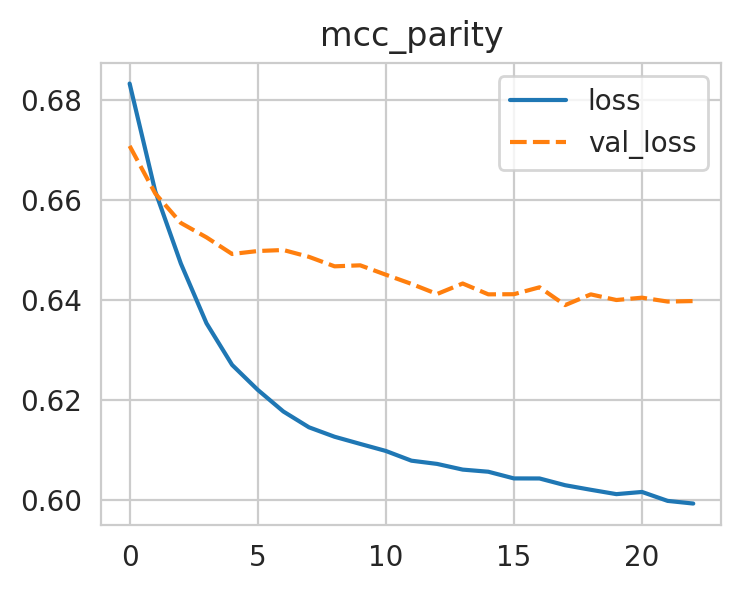

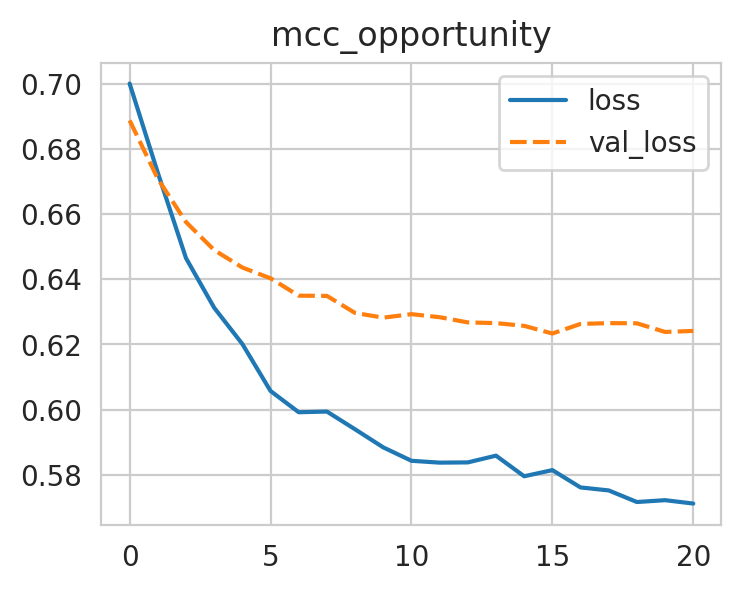

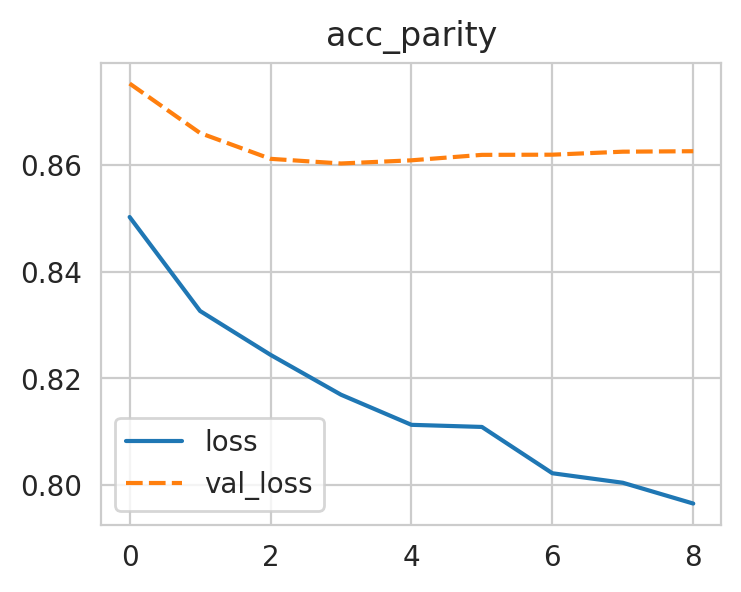

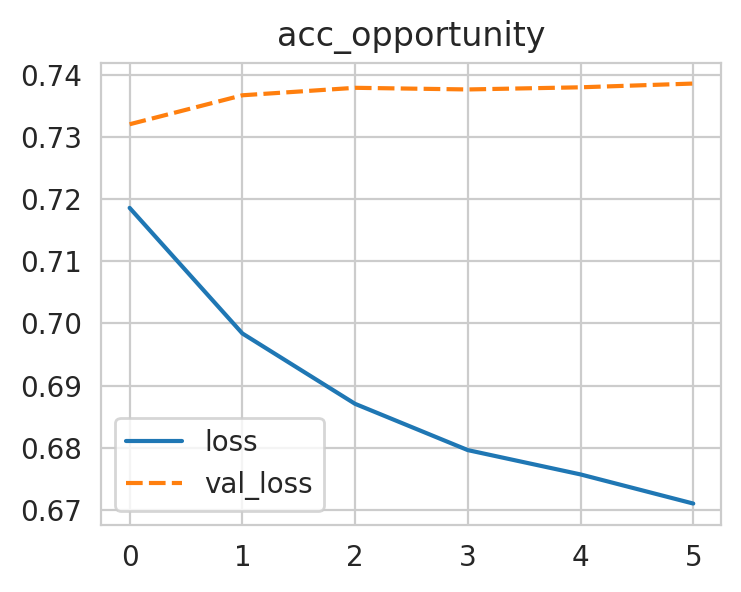

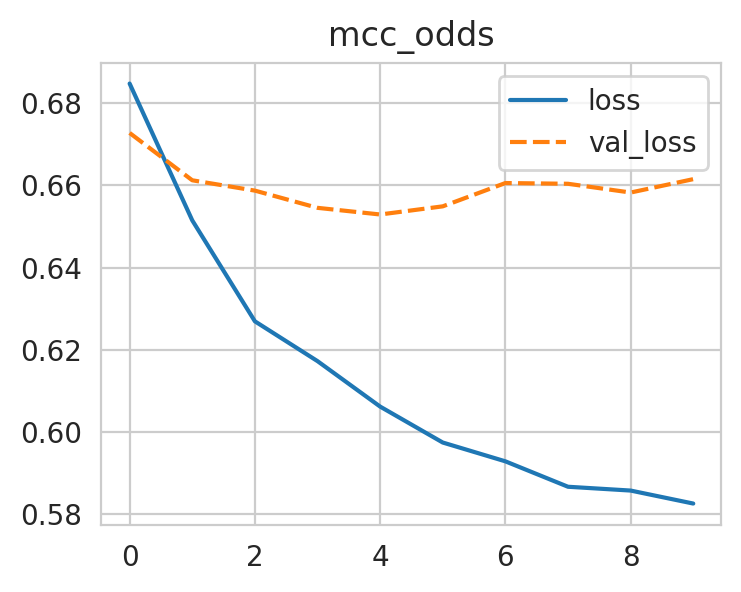

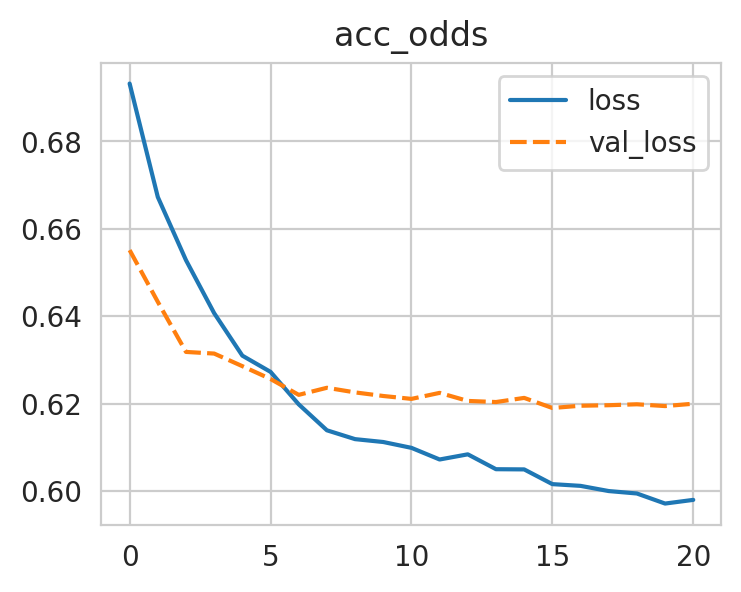

In [28]:
for fitness_rule in fitness_rules:
    tf_history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['best_solution_tf_history']
    solution = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['solution'].iloc[0]
    tf_history = json.loads(tf_history.iloc[0].replace('\'', '\"'))
    fig, ax = plt.subplots(figsize=(4, 3), dpi = 200)
    sns.lineplot(tf_history, ax=ax).set(title=fitness_rule)

/tmp/ipykernel_30571/1687407410.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['tune_results_history']\
/tmp/ipykernel_30571/1687407410.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['tune_results_history']\
/tmp/ipykernel_30571/1687407410.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['tune_results_history']\
/tmp/ipykernel_30571/1687407410.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['tune_results_history']\
/tmp/ipykernel_30571/1687407410.

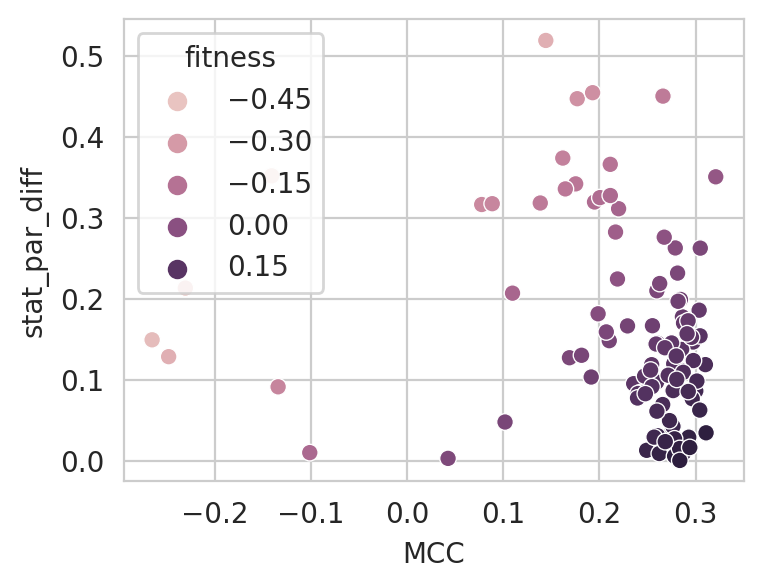

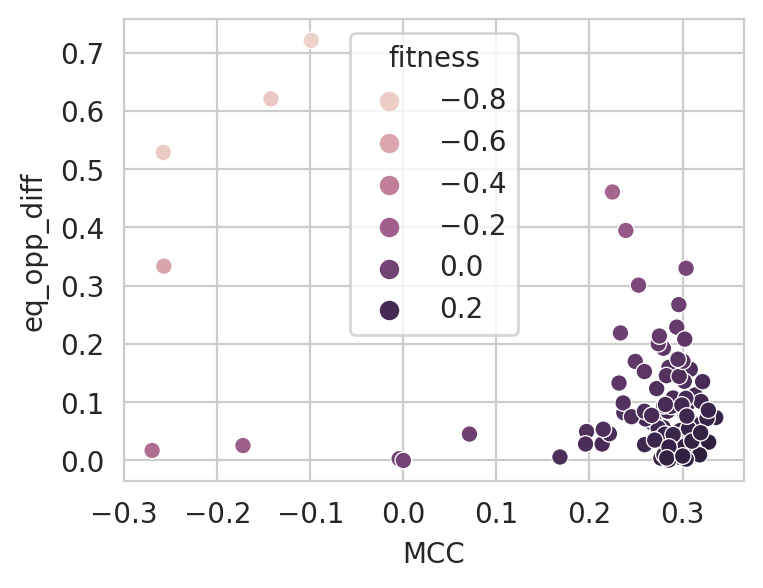

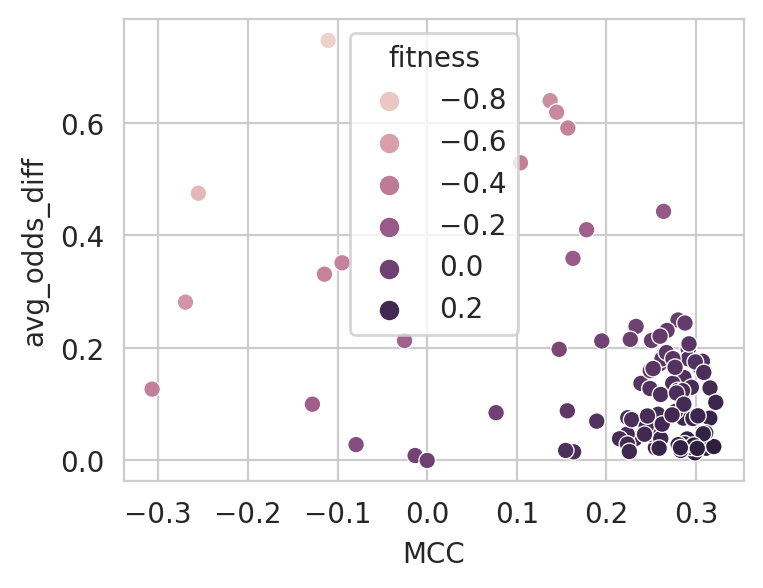

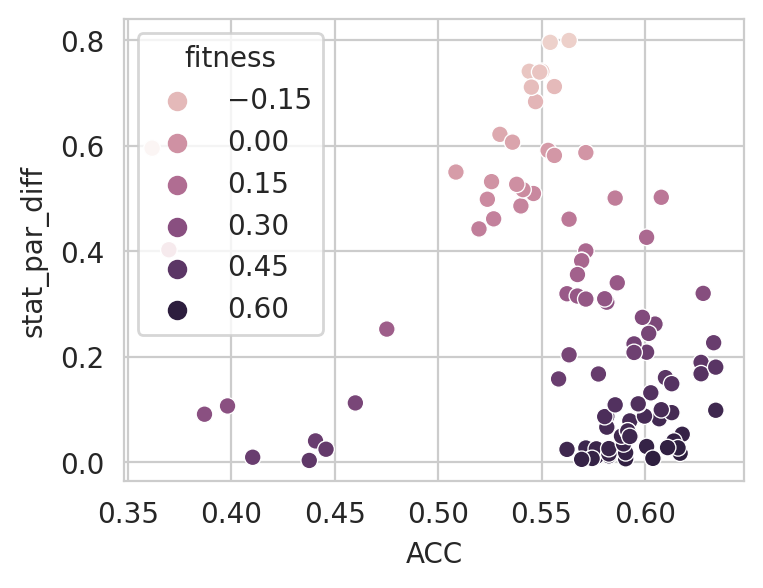

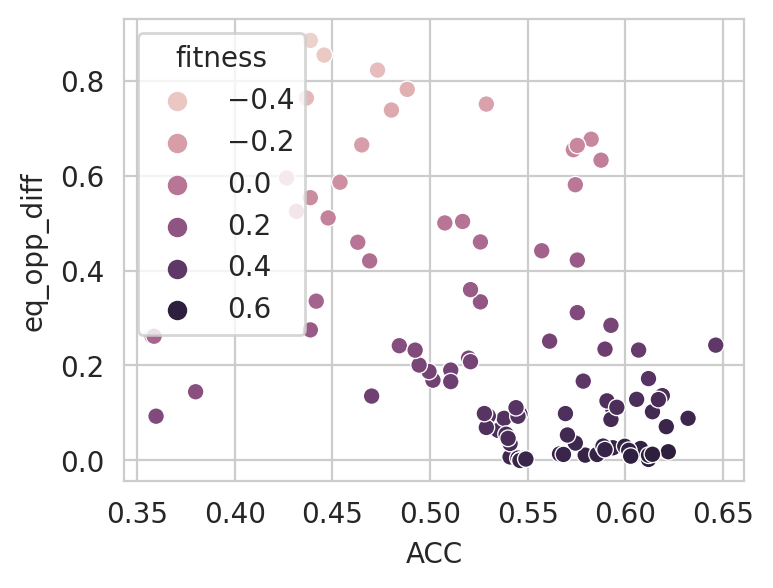

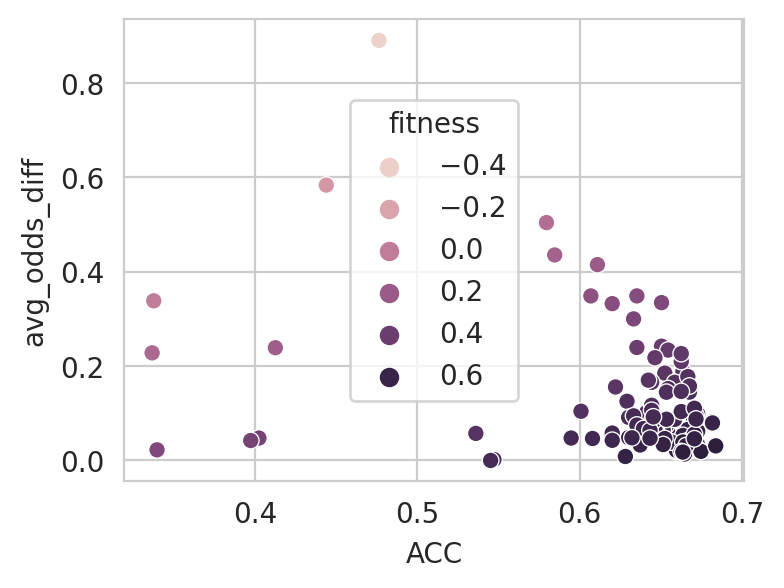

In [27]:
for fitness_rule, metrics in fitness_rules_target_metrics.items():
    compas[compas['fitness_rule'] == fitness_rule][['method', 'fitness', metrics['performance'], metrics['fairness']]].sort_values(by=['fitness'], ascending=False)

    history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['tune_results_history']\
                .iloc[0].replace('\'','\"').replace('inf','0')
    history = json.loads(history)
    fig, ax = plt.subplots(figsize=(4, 3), dpi = 200)
    sns.scatterplot(convert_to_json_of_arrays(history), x=fitness_rules_target_metrics[fitness_rule]['performance'],
                    y=fitness_rules_target_metrics[fitness_rule]['fairness'], hue='fitness')